# Cardiovascular Disease Prediction Using KNN Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np 
%matplotlib notebook

In [2]:
data = pd.read_csv('E:/Data Sets/heart.csv')
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.rename(columns={'cp':'ChestPain','trestbps':'RestBP','chol':'Cholestoral','fbs':'Blood Sugar',
                        'restecg':'ECG','thalach':'MAXHeartRate','exang':'ExerciseAngina','ca':'MajorVessels','target':'Target'})

In [4]:
df

,age,sex,ChestPain,RestBP,Cholestoral,Blood Sugar,ECG,MAXHeartRate,ExerciseAngina,oldpeak,slope,MajorVessels,thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Descriptive Statistics of the Dataset.

In [5]:
df.describe()

,age,sex,ChestPain,RestBP,Cholestoral,Blood Sugar,ECG,MAXHeartRate,ExerciseAngina,oldpeak,slope,MajorVessels,thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.dtypes

age                 int64
sex                 int64
ChestPain           int64
RestBP              int64
Cholestoral         int64
Blood Sugar         int64
ECG                 int64
MAXHeartRate        int64
ExerciseAngina      int64
oldpeak           float64
slope               int64
MajorVessels        int64
thal                int64
Target              int64
dtype: object

In [7]:
df.columns

Index(['age', 'sex', 'ChestPain', 'RestBP', 'Cholestoral', 'Blood Sugar',
       'ECG', 'MAXHeartRate', 'ExerciseAngina', 'oldpeak', 'slope',
       'MajorVessels', 'thal', 'Target'],
      dtype='object')

# Visualizing the Cholesterol Level of individuals present in the Dataset.

<IPython.core.display.Javascript object>


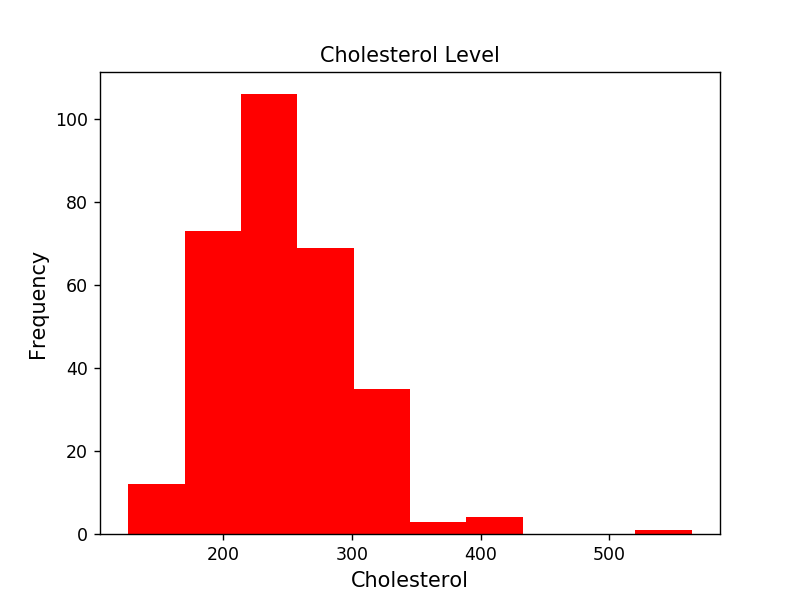

Text(0.5, 1.0, 'Cholesterol Level')

In [8]:
df['Cholestoral'].plot(kind='hist',color='r')
mp.xlabel('Cholesterol',fontsize='12')
mp.ylabel('Frequency',fontsize='12')
mp.title('Cholesterol Level',fontsize='12')

# Defining the Independent Variable (X).

In [9]:
X = df[['age','sex','ChestPain','RestBP','Cholestoral','Blood Sugar','ECG','MAXHeartRate',
        'ExerciseAngina','oldpeak','slope','MajorVessels','thal']].values

In [10]:
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

# Normalizing the independent variable values before creating a model.

In [11]:
from sklearn import preprocessing

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

# Defining the Dependent Variable (y).

In [13]:
y = df['Target'].values
y[0:300]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

# Split the Dataset into training data and test data.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=5)

In [16]:
print ('Training Set:',X_train.shape,y_train.shape)
print ('Testing Set:',X_test.shape, y_test.shape)

Training Set: (196, 13) (196,)
Testing Set: (107, 13) (107,)


# Develop a ML Model using K-Nearest Neighbor Algorithm

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
#To find the best k for the model
K = 10
mean_acc = []
for n in range(1,K+1,2):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(accuracy_score(y_test, yhat))

mean_acc

[0.7476635514018691,
 0.8130841121495327,
 0.8785046728971962,
 0.8598130841121495,
 0.8504672897196262]

In [19]:
k = 5
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train,y_train)
yhat = KNN.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,yhat))

Accuracy Score: 0.8785046728971962


# Perform model evaluation to check the model accuracy.

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.91      0.86      0.88        57

    accuracy                           0.88       107
   macro avg       0.88      0.88      0.88       107
weighted avg       0.88      0.88      0.88       107



In [22]:
from sklearn.metrics import plot_confusion_matrix

<IPython.core.display.Javascript object>


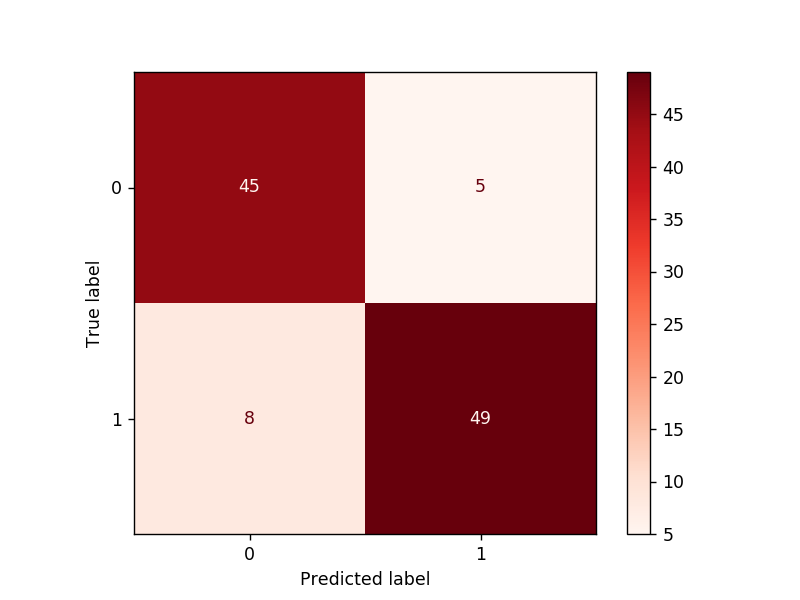

In [23]:
disp = plot_confusion_matrix(KNN, X_test, y_test, cmap='Reds')

# THE END